In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())))
from Poker.agents.game_state import GameState, Player
from Poker.agents.game_state import *
from Poker.core.card import *
from Poker.core.card import Rank
from agents.deep_learning_agent import PokerPlayerNetV1


import os
import sys
from typing import List, Dict, Tuple, Optional, Any
from Poker.agents.game_state import GameStateBuilder
from Poker.agents.game_state import GameStateRetriever
from Poker.core.gamestage import Stage
from Poker.core.action import Action

import random
import numpy as np
import torch
import itertools

In [2]:
def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

In [3]:
set_seed(42)

## Data

In [4]:
retriever = GameStateRetriever('../pluribus', verbose=False)
all_game_states = []
for player in ['MrBlue', 'MrBlonde', 'MrWhite', 'MrPink', 'MrBrown', 'Pluribus']:
    game_states = retriever.get_player_game_states(player)
    all_game_states.append(game_states)
    print(f"Found {len(game_states)} GameStates for {player}")

Found 13411 GameStates for MrBlue
Found 3289 GameStates for MrBlonde
Found 6174 GameStates for MrWhite
Found 8340 GameStates for MrPink
Found 1918 GameStates for MrBrown
Found 13876 GameStates for Pluribus


In [5]:
game_states = list(itertools.chain.from_iterable(all_game_states))

In [6]:
random.shuffle(game_states)

In [7]:
train_game_states = game_states[:-1000]
valid_game_states = game_states[-1000:]

In [8]:
gs = game_states[9]

In [9]:
gs.stage

<Stage.PREFLOP: 0>

In [10]:
gs.my_player_action

(<Action.FOLD: 0>, None)

In [11]:
gs.my_player.history, gs.my_player.spots_left_bb

([], 1)

In [12]:
for p in gs.other_players:
    print(p.history, p.spots_left_bb)

[] 5
[] 0
[] 2
[] 3
[] 4


In [13]:
gs.get_effective_turns()

(0, [4, 5, 1, 2, 3])

In [14]:
train_dl = PokerPlayerNetV1.get_game_state_data_loader(train_game_states)
valid_dl = PokerPlayerNetV1.get_game_state_data_loader(valid_game_states)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 33460.74it/s]


## Training V2

In [15]:
my_agent = PokerPlayerNetV1(use_batchnorm=False)

In [16]:
train_df = my_agent.train_model(train_dl, valid_dl, num_epochs=50, lr=1e-4, device=None, eval_steps=100)

/opt/homebrew/anaconda3/envs/py-pip/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                                                                                                                                                      | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Train Loss: 2.4077
Validation Loss: 1.8309, avg_val_action_acc: 0.5079, avg_val_raise_size_mse: 0.7728666794441995
Epoch 1/50, Train Loss: 2.0054
Validation Loss: 1.5990, avg_val_action_acc: 0.5962, avg_val_raise_size_mse: 0.5950129718726708
Epoch 1/50, Train Loss: 1.4922
Validation Loss: 1.4382, avg_val_action_acc: 0.6290, avg_val_raise_size_mse: 0.49094956190813155
Epoch 1/50, Train Loss: 1.3819
Validation Loss: 1.2546, avg_val_action_acc: 0.7034, avg_val_raise_size_mse: 0.36902733041446595
Epoch 1/50, Train Loss: 1.2671
Validation Loss: 1.1753, avg_val_action_acc: 0.7024, avg_val_raise_size_mse: 0.33457550995369695
Epoch 1/50, Train Loss: 1.1323
Validation Loss: 1.2356, avg_val_action_acc: 0.7004, avg_val_raise_size_mse: 0.41857859388821655
Epoch 1/50, Train Loss: 1.0955
Validation Loss: 1.1377, avg_val_action_acc: 0.7024, avg_val_raise_size_mse: 0.35076954748665373
Epoch 1/50, Train Loss: 1.1706
Validation Loss: 1.0814, avg_val_action_acc: 0.7014, avg_val_raise_size_mse

  2%|███▏                                                                                                                                                          | 1/50 [00:04<03:49,  4.68s/it]

Epoch 2/50, Train Loss: 0.9214
Validation Loss: 0.9014, avg_val_action_acc: 0.7272, avg_val_raise_size_mse: 0.18615577015138807
Epoch 2/50, Train Loss: 0.9084
Validation Loss: 0.9410, avg_val_action_acc: 0.7252, avg_val_raise_size_mse: 0.22780239104574163
Epoch 2/50, Train Loss: 1.1226
Validation Loss: 0.9156, avg_val_action_acc: 0.7232, avg_val_raise_size_mse: 0.20384069880293237
Epoch 2/50, Train Loss: 1.0602
Validation Loss: 0.9331, avg_val_action_acc: 0.7212, avg_val_raise_size_mse: 0.21957851099201464
Epoch 2/50, Train Loss: 0.9281
Validation Loss: 0.9191, avg_val_action_acc: 0.7212, avg_val_raise_size_mse: 0.20363816948947572
Epoch 2/50, Train Loss: 0.8741
Validation Loss: 0.9234, avg_val_action_acc: 0.7252, avg_val_raise_size_mse: 0.22040584976350638
Epoch 2/50, Train Loss: 0.9782
Validation Loss: 1.0068, avg_val_action_acc: 0.7222, avg_val_raise_size_mse: 0.2966015920131227
Epoch 2/50, Train Loss: 0.8854
Validation Loss: 0.9474, avg_val_action_acc: 0.7192, avg_val_raise_size_ms

  4%|██████▎                                                                                                                                                       | 2/50 [00:09<03:42,  4.63s/it]

Epoch 2/50, Train Loss: 0.9164
Validation Loss: 0.8178, avg_val_action_acc: 0.7232, avg_val_raise_size_mse: 0.20788987741726156
Epoch 3/50, Train Loss: 0.8279
Validation Loss: 0.7905, avg_val_action_acc: 0.7331, avg_val_raise_size_mse: 0.1732890867121843
Epoch 3/50, Train Loss: 0.8521
Validation Loss: 0.7954, avg_val_action_acc: 0.7262, avg_val_raise_size_mse: 0.18901238924572392
Epoch 3/50, Train Loss: 0.8991
Validation Loss: 0.8092, avg_val_action_acc: 0.7688, avg_val_raise_size_mse: 0.20622073644921937
Epoch 3/50, Train Loss: 0.7594
Validation Loss: 0.8040, avg_val_action_acc: 0.7490, avg_val_raise_size_mse: 0.20468547650671098
Epoch 3/50, Train Loss: 0.7935
Validation Loss: 0.8487, avg_val_action_acc: 0.7758, avg_val_raise_size_mse: 0.2564825153917015
Epoch 3/50, Train Loss: 0.9933
Validation Loss: 0.7938, avg_val_action_acc: 0.7768, avg_val_raise_size_mse: 0.20734748461062924
Epoch 3/50, Train Loss: 0.8499
Validation Loss: 0.7587, avg_val_action_acc: 0.7798, avg_val_raise_size_mse

  6%|█████████▍                                                                                                                                                    | 3/50 [00:13<03:36,  4.61s/it]

Epoch 4/50, Train Loss: 0.9353
Validation Loss: 0.7502, avg_val_action_acc: 0.7808, avg_val_raise_size_mse: 0.20402126410414304
Epoch 4/50, Train Loss: 0.8391
Validation Loss: 0.7583, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.22068776211161759
Epoch 4/50, Train Loss: 0.7288
Validation Loss: 0.7334, avg_val_action_acc: 0.7788, avg_val_raise_size_mse: 0.1913453625544669
Epoch 4/50, Train Loss: 0.7515
Validation Loss: 0.7541, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.221062872185564
Epoch 4/50, Train Loss: 0.8843
Validation Loss: 0.8139, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.2744935313457467
Epoch 4/50, Train Loss: 0.8709
Validation Loss: 0.7913, avg_val_action_acc: 0.7798, avg_val_raise_size_mse: 0.2553432100186391
Epoch 4/50, Train Loss: 0.7727
Validation Loss: 0.7319, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.19627899298119167
Epoch 4/50, Train Loss: 0.7513
Validation Loss: 0.7312, avg_val_action_acc: 0.7778, avg_val_raise_size_mse: 0

  8%|████████████▋                                                                                                                                                 | 4/50 [00:18<03:31,  4.59s/it]

Epoch 4/50, Train Loss: 0.7593
Validation Loss: 0.8530, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.33486485377696024
Epoch 5/50, Train Loss: 0.7297
Validation Loss: 0.7389, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.2174767518955623
Epoch 5/50, Train Loss: 0.7980
Validation Loss: 0.7412, avg_val_action_acc: 0.7808, avg_val_raise_size_mse: 0.22088079567119065
Epoch 5/50, Train Loss: 0.7194
Validation Loss: 0.6883, avg_val_action_acc: 0.7808, avg_val_raise_size_mse: 0.16906379922774148
Epoch 5/50, Train Loss: 1.3727
Validation Loss: 0.7032, avg_val_action_acc: 0.7758, avg_val_raise_size_mse: 0.16371515590516436
Epoch 5/50, Train Loss: 0.7813
Validation Loss: 0.7214, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.20285642131073794
Epoch 5/50, Train Loss: 0.9119
Validation Loss: 0.6979, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.17377218625331028
Epoch 5/50, Train Loss: 0.7828
Validation Loss: 0.7015, avg_val_action_acc: 0.7837, avg_val_raise_size_ms

 10%|███████████████▊                                                                                                                                              | 5/50 [00:22<03:26,  4.58s/it]

Epoch 5/50, Train Loss: 0.7100
Validation Loss: 0.7121, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.19255468475499324
Epoch 6/50, Train Loss: 0.8425
Validation Loss: 0.7036, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1979136514691784
Epoch 6/50, Train Loss: 0.7708
Validation Loss: 0.7212, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.2109127184008064
Epoch 6/50, Train Loss: 0.7054
Validation Loss: 0.7618, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.25441419548680266
Epoch 6/50, Train Loss: 0.8328
Validation Loss: 0.6863, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.17212715357036648
Epoch 6/50, Train Loss: 0.7138
Validation Loss: 0.6670, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.15370201459177585
Epoch 6/50, Train Loss: 0.6637
Validation Loss: 0.6852, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.17824161137488434
Epoch 6/50, Train Loss: 0.9341
Validation Loss: 0.7635, avg_val_action_acc: 0.7867, avg_val_raise_size_mse

 12%|██████████████████▉                                                                                                                                           | 6/50 [00:27<03:22,  4.61s/it]

Epoch 6/50, Train Loss: 0.6549
Validation Loss: 0.6763, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1779259503689698
Epoch 7/50, Train Loss: 0.6315
Validation Loss: 0.6742, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.17844479855626733
Epoch 7/50, Train Loss: 0.7435
Validation Loss: 0.7922, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.2946969623121226
Epoch 7/50, Train Loss: 0.6898
Validation Loss: 0.7020, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.2070745254704167
Epoch 7/50, Train Loss: 0.6390
Validation Loss: 0.7021, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.20660961370283207
Epoch 7/50, Train Loss: 0.8204
Validation Loss: 0.6796, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.17850466914445398
Epoch 7/50, Train Loss: 0.6330
Validation Loss: 0.6796, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.1813776437895343
Epoch 7/50, Train Loss: 0.7402
Validation Loss: 0.6992, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 

 14%|██████████████████████                                                                                                                                        | 7/50 [00:32<03:18,  4.62s/it]

Epoch 8/50, Train Loss: 1.1455
Validation Loss: 0.6724, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.17874549468598117
Epoch 8/50, Train Loss: 0.6841
Validation Loss: 0.6705, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.17101425203919274
Epoch 8/50, Train Loss: 0.7138
Validation Loss: 0.6741, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.1753748241231762
Epoch 8/50, Train Loss: 0.6383
Validation Loss: 0.6552, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.16350439955602356
Epoch 8/50, Train Loss: 0.8326
Validation Loss: 0.7352, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.24244105491864806
Epoch 8/50, Train Loss: 0.7927
Validation Loss: 0.6807, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.18804844432059556
Epoch 8/50, Train Loss: 0.7165
Validation Loss: 0.7332, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.24013281835147018
Epoch 8/50, Train Loss: 0.7378
Validation Loss: 0.6840, avg_val_action_acc: 0.7877, avg_val_raise_size_ms

 16%|█████████████████████████▎                                                                                                                                    | 8/50 [00:36<03:13,  4.62s/it]

Epoch 8/50, Train Loss: 0.6884
Validation Loss: 0.6940, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.20377184772431584
Epoch 9/50, Train Loss: 0.8367
Validation Loss: 0.6741, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.17827288263186433
Epoch 9/50, Train Loss: 0.6976
Validation Loss: 0.6762, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.19082281142029733
Epoch 9/50, Train Loss: 0.6429
Validation Loss: 0.6907, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.20032939715273973
Epoch 9/50, Train Loss: 0.6710
Validation Loss: 0.6802, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.1882987533767196
Epoch 9/50, Train Loss: 0.6757
Validation Loss: 0.6904, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.20262270179828482
Epoch 9/50, Train Loss: 0.7636
Validation Loss: 0.7155, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.2300114482936878
Epoch 9/50, Train Loss: 0.6360
Validation Loss: 0.6660, avg_val_action_acc: 0.7897, avg_val_raise_size_mse

 18%|████████████████████████████▍                                                                                                                                 | 9/50 [00:41<03:09,  4.61s/it]

Epoch 9/50, Train Loss: 0.6597
Validation Loss: 0.6559, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.16981151015594756
Epoch 10/50, Train Loss: 0.7919
Validation Loss: 0.6496, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.16571368458304883
Epoch 10/50, Train Loss: 0.6548
Validation Loss: 0.6378, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.15499652236007572
Epoch 10/50, Train Loss: 0.7450
Validation Loss: 0.6566, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.1723652700999833
Epoch 10/50, Train Loss: 0.6168
Validation Loss: 0.6804, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.19736022306680087
Epoch 10/50, Train Loss: 0.6499
Validation Loss: 0.6903, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.21252847445799808
Epoch 10/50, Train Loss: 0.7032
Validation Loss: 0.6550, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.17033984109071926
Epoch 10/50, Train Loss: 0.6217
Validation Loss: 0.6621, avg_val_action_acc: 0.7976, avg_val_raise_

 20%|███████████████████████████████▍                                                                                                                             | 10/50 [00:46<03:04,  4.60s/it]

Epoch 11/50, Train Loss: 0.7062
Validation Loss: 0.6493, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.17198849557196752
Epoch 11/50, Train Loss: 0.6851
Validation Loss: 0.7376, avg_val_action_acc: 0.7976, avg_val_raise_size_mse: 0.2607516695612243
Epoch 11/50, Train Loss: 0.5907
Validation Loss: 0.6371, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.158806325677731
Epoch 11/50, Train Loss: 0.7028
Validation Loss: 0.6333, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1517081612019822
Epoch 11/50, Train Loss: 0.6741
Validation Loss: 0.7139, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.21817627953391316
Epoch 11/50, Train Loss: 0.7815
Validation Loss: 0.7064, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.2245658220407287
Epoch 11/50, Train Loss: 0.9094
Validation Loss: 0.8335, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.31313970355716136
Epoch 11/50, Train Loss: 0.7279
Validation Loss: 0.6566, avg_val_action_acc: 0.7887, avg_val_raise_siz

 22%|██████████████████████████████████▌                                                                                                                          | 11/50 [00:50<02:58,  4.58s/it]

Epoch 11/50, Train Loss: 0.7806
Validation Loss: 0.6649, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.18677725220867802
Epoch 12/50, Train Loss: 0.6922
Validation Loss: 0.6558, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.17082872150451064
Epoch 12/50, Train Loss: 0.7135
Validation Loss: 0.6513, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.172829757719892
Epoch 12/50, Train Loss: 0.6198
Validation Loss: 0.6446, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.16966469631953504
Epoch 12/50, Train Loss: 1.1154
Validation Loss: 0.6431, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.16411650500404426
Epoch 12/50, Train Loss: 0.6932
Validation Loss: 0.6400, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.16446726051401764
Epoch 12/50, Train Loss: 0.7249
Validation Loss: 0.7840, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.3053065368911207
Epoch 12/50, Train Loss: 0.6661
Validation Loss: 0.6486, avg_val_action_acc: 0.7927, avg_val_raise_s

 24%|█████████████████████████████████████▋                                                                                                                       | 12/50 [00:55<02:53,  4.57s/it]

Epoch 13/50, Train Loss: 0.7509
Validation Loss: 0.6996, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.22122047716229212
Epoch 13/50, Train Loss: 1.1753
Validation Loss: 0.6710, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.19065827832719873
Epoch 13/50, Train Loss: 0.6763
Validation Loss: 0.6690, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.18426735618240422
Epoch 13/50, Train Loss: 0.6578
Validation Loss: 0.6917, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.21530344830696574
Epoch 13/50, Train Loss: 0.6570
Validation Loss: 0.6470, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.17249598528978244
Epoch 13/50, Train Loss: 0.6881
Validation Loss: 0.6276, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.15268513185259913
Epoch 13/50, Train Loss: 0.7633
Validation Loss: 0.6708, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.18910902114178513
Epoch 13/50, Train Loss: 0.6517
Validation Loss: 0.7207, avg_val_action_acc: 0.7897, avg_val_rais

 26%|████████████████████████████████████████▊                                                                                                                    | 13/50 [00:59<02:48,  4.56s/it]

Epoch 14/50, Train Loss: 0.6252
Validation Loss: 0.6174, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.14633711290246407
Epoch 14/50, Train Loss: 0.6670
Validation Loss: 0.6503, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.17674481817280932
Epoch 14/50, Train Loss: 0.9189
Validation Loss: 0.6341, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.16073131600823548
Epoch 14/50, Train Loss: 0.7413
Validation Loss: 0.6713, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.19285342710033532
Epoch 14/50, Train Loss: 0.6485
Validation Loss: 0.6305, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.14880200128241014
Epoch 14/50, Train Loss: 0.6542
Validation Loss: 0.6617, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.1840984043092393
Epoch 14/50, Train Loss: 0.7919
Validation Loss: 0.6494, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.172502830904647
Epoch 14/50, Train Loss: 0.8222
Validation Loss: 0.6321, avg_val_action_acc: 0.7897, avg_val_raise_s

 28%|███████████████████████████████████████████▉                                                                                                                 | 14/50 [01:04<02:44,  4.56s/it]

Epoch 14/50, Train Loss: 0.6850
Validation Loss: 0.6531, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.18352390711596753
Epoch 15/50, Train Loss: 0.6812
Validation Loss: 0.6575, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1817360131563397
Epoch 15/50, Train Loss: 0.7189
Validation Loss: 0.6368, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.16319851012852427
Epoch 15/50, Train Loss: 0.7432
Validation Loss: 0.6271, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.15580672400981366
Epoch 15/50, Train Loss: 0.6470
Validation Loss: 0.6328, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.16142016100431128
Epoch 15/50, Train Loss: 0.7778
Validation Loss: 0.6442, avg_val_action_acc: 0.7827, avg_val_raise_size_mse: 0.16873913727393966
Epoch 15/50, Train Loss: 0.7263
Validation Loss: 0.6921, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.21075540823152378
Epoch 15/50, Train Loss: 0.7832
Validation Loss: 0.6377, avg_val_action_acc: 0.7917, avg_val_raise

 30%|███████████████████████████████████████████████                                                                                                              | 15/50 [01:08<02:39,  4.55s/it]

Epoch 16/50, Train Loss: 0.7038
Validation Loss: 0.6438, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.1747296168487371
Epoch 16/50, Train Loss: 0.6055
Validation Loss: 0.6633, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.19489697664897584
Epoch 16/50, Train Loss: 0.8126
Validation Loss: 0.6444, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.17055323644955125
Epoch 16/50, Train Loss: 0.6525
Validation Loss: 0.6645, avg_val_action_acc: 0.7827, avg_val_raise_size_mse: 0.1871817347922525
Epoch 16/50, Train Loss: 0.6448
Validation Loss: 0.6732, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.2006394991296388
Epoch 16/50, Train Loss: 0.7133
Validation Loss: 0.6507, avg_val_action_acc: 0.7778, avg_val_raise_size_mse: 0.17415586835519958
Epoch 16/50, Train Loss: 0.8479
Validation Loss: 0.6602, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.18354585180835178
Epoch 16/50, Train Loss: 0.9288
Validation Loss: 0.6184, avg_val_action_acc: 0.7937, avg_val_raise_s

 32%|██████████████████████████████████████████████████▏                                                                                                          | 16/50 [01:13<02:34,  4.55s/it]

Epoch 16/50, Train Loss: 0.8019
Validation Loss: 0.6330, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.1636270233688218
Epoch 17/50, Train Loss: 0.6913
Validation Loss: 0.7178, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.23585940010282988
Epoch 17/50, Train Loss: 0.6190
Validation Loss: 0.6219, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.15928595954374897
Epoch 17/50, Train Loss: 0.7366
Validation Loss: 0.6395, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1601681764208017
Epoch 17/50, Train Loss: 0.7432
Validation Loss: 0.6464, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.17245149933585216
Epoch 17/50, Train Loss: 0.6979
Validation Loss: 0.6353, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.1675361506469984
Epoch 17/50, Train Loss: 0.7187
Validation Loss: 0.6009, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.13817808423782624
Epoch 17/50, Train Loss: 1.3525
Validation Loss: 0.6737, avg_val_action_acc: 0.7956, avg_val_raise_s

 34%|█████████████████████████████████████████████████████▍                                                                                                       | 17/50 [01:17<02:30,  4.55s/it]

Epoch 17/50, Train Loss: 0.7414
Validation Loss: 0.6227, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.1523844607891367
Epoch 18/50, Train Loss: 0.6236
Validation Loss: 0.6308, avg_val_action_acc: 0.7986, avg_val_raise_size_mse: 0.1671176413526862
Epoch 18/50, Train Loss: 0.6767
Validation Loss: 0.6291, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.16109382319818688
Epoch 18/50, Train Loss: 0.5960
Validation Loss: 0.6685, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.20294608031344114
Epoch 18/50, Train Loss: 0.7016
Validation Loss: 0.6450, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.16994654612674837
Epoch 18/50, Train Loss: 0.8127
Validation Loss: 0.6535, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.1870623055336413
Epoch 18/50, Train Loss: 0.6182
Validation Loss: 0.6465, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.1769207628177745
Epoch 18/50, Train Loss: 0.8443
Validation Loss: 0.6306, avg_val_action_acc: 0.7887, avg_val_raise_si

 36%|████████████████████████████████████████████████████████▌                                                                                                    | 18/50 [01:22<02:25,  4.55s/it]

Epoch 19/50, Train Loss: 0.7880
Validation Loss: 0.7014, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.23823680538713696
Epoch 19/50, Train Loss: 0.8369
Validation Loss: 0.6560, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.18325870767945335
Epoch 19/50, Train Loss: 0.6880
Validation Loss: 0.6307, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.1609857600729262
Epoch 19/50, Train Loss: 0.6272
Validation Loss: 0.6076, avg_val_action_acc: 0.7996, avg_val_raise_size_mse: 0.1459371291044619
Epoch 19/50, Train Loss: 1.2146
Validation Loss: 0.6287, avg_val_action_acc: 0.8204, avg_val_raise_size_mse: 0.1520704059248026
Epoch 19/50, Train Loss: 0.6523
Validation Loss: 0.6424, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.1749874549901246
Epoch 19/50, Train Loss: 0.7322
Validation Loss: 0.6172, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.15633590864031466
Epoch 19/50, Train Loss: 0.7674
Validation Loss: 0.6151, avg_val_action_acc: 0.7946, avg_val_raise_si

 38%|███████████████████████████████████████████████████████████▋                                                                                                 | 19/50 [01:27<02:21,  4.56s/it]

Epoch 19/50, Train Loss: 0.6402
Validation Loss: 0.6139, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.1547122449126272
Epoch 20/50, Train Loss: 0.6518
Validation Loss: 0.6223, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.16001924810310206
Epoch 20/50, Train Loss: 0.7113
Validation Loss: 0.6211, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1534060094861724
Epoch 20/50, Train Loss: 0.7271
Validation Loss: 0.6383, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.1756698021901742
Epoch 20/50, Train Loss: 0.5842
Validation Loss: 0.5932, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.1298857990620909
Epoch 20/50, Train Loss: 0.6977
Validation Loss: 0.6372, avg_val_action_acc: 0.7976, avg_val_raise_size_mse: 0.17808233906647988
Epoch 20/50, Train Loss: 0.7452
Validation Loss: 0.6502, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.18278543052396604
Epoch 20/50, Train Loss: 0.6673
Validation Loss: 0.6010, avg_val_action_acc: 0.7917, avg_val_raise_si

 40%|██████████████████████████████████████████████████████████████▊                                                                                              | 20/50 [01:31<02:17,  4.57s/it]

Epoch 21/50, Train Loss: 0.6710
Validation Loss: 0.6130, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.15544156332838438
Epoch 21/50, Train Loss: 0.6508
Validation Loss: 0.6870, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.22071604110625764
Epoch 21/50, Train Loss: 0.6992
Validation Loss: 0.6426, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.17533690299683619
Epoch 21/50, Train Loss: 0.6484
Validation Loss: 0.6100, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.14559961355657183
Epoch 21/50, Train Loss: 0.9128
Validation Loss: 0.6318, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.16544478209984917
Epoch 21/50, Train Loss: 0.8002
Validation Loss: 0.6310, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.16650581110032306
Epoch 21/50, Train Loss: 0.6642
Validation Loss: 0.6521, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.18967554467062223
Epoch 21/50, Train Loss: 0.7944
Validation Loss: 0.6252, avg_val_action_acc: 0.7937, avg_val_rais

 42%|█████████████████████████████████████████████████████████████████▉                                                                                           | 21/50 [01:36<02:12,  4.55s/it]

Epoch 22/50, Train Loss: 0.5986
Validation Loss: 0.6369, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.17718154039337403
Epoch 22/50, Train Loss: 0.6927
Validation Loss: 0.6779, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.21814444948852593
Epoch 22/50, Train Loss: 0.6249
Validation Loss: 0.6368, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.18104093338964353
Epoch 22/50, Train Loss: 0.6192
Validation Loss: 0.6432, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.1704337738143901
Epoch 22/50, Train Loss: 0.6556
Validation Loss: 0.6491, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.18338104237187827
Epoch 22/50, Train Loss: 0.8604
Validation Loss: 0.6143, avg_val_action_acc: 0.7976, avg_val_raise_size_mse: 0.15690855488425032
Epoch 22/50, Train Loss: 1.2145
Validation Loss: 0.6234, avg_val_action_acc: 0.8185, avg_val_raise_size_mse: 0.15327569657182766
Epoch 22/50, Train Loss: 0.7554
Validation Loss: 0.6195, avg_val_action_acc: 0.7927, avg_val_raise

 44%|█████████████████████████████████████████████████████████████████████                                                                                        | 22/50 [01:40<02:07,  4.56s/it]

Epoch 22/50, Train Loss: 0.6494
Validation Loss: 0.6272, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.17043661537169852
Epoch 23/50, Train Loss: 0.7954
Validation Loss: 0.6560, avg_val_action_acc: 0.8165, avg_val_raise_size_mse: 0.18404595660681408
Epoch 23/50, Train Loss: 0.6870
Validation Loss: 0.6298, avg_val_action_acc: 0.7827, avg_val_raise_size_mse: 0.17001689769445905
Epoch 23/50, Train Loss: 0.7602
Validation Loss: 0.6068, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.1489851574390178
Epoch 23/50, Train Loss: 0.6332
Validation Loss: 0.6367, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.17186113996412752
Epoch 23/50, Train Loss: 1.1716
Validation Loss: 0.6125, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.14020517744153502
Epoch 23/50, Train Loss: 0.6164
Validation Loss: 0.6284, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.16077153171303624
Epoch 23/50, Train Loss: 0.8047
Validation Loss: 0.6357, avg_val_action_acc: 0.7827, avg_val_raise

 46%|████████████████████████████████████████████████████████████████████████▏                                                                                    | 23/50 [01:45<02:03,  4.58s/it]

Epoch 24/50, Train Loss: 0.6964
Validation Loss: 0.6132, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.15303311468469763
Epoch 24/50, Train Loss: 0.6530
Validation Loss: 0.6348, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.17559731327226416
Epoch 24/50, Train Loss: 0.8907
Validation Loss: 0.6309, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.15733923978260708
Epoch 24/50, Train Loss: 0.6079
Validation Loss: 0.6282, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.16698786272068641
Epoch 24/50, Train Loss: 0.6272
Validation Loss: 0.6115, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.15600854330622252
Epoch 24/50, Train Loss: 0.6805
Validation Loss: 0.6282, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.16964780601447563
Epoch 24/50, Train Loss: 0.5570
Validation Loss: 0.6141, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.15190272269974628
Epoch 24/50, Train Loss: 0.6436
Validation Loss: 0.6166, avg_val_action_acc: 0.7927, avg_val_rais

 48%|███████████████████████████████████████████████████████████████████████████▎                                                                                 | 24/50 [01:49<01:59,  4.59s/it]

Epoch 24/50, Train Loss: 0.6438
Validation Loss: 0.6330, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.17378653808266373
Epoch 25/50, Train Loss: 0.6607
Validation Loss: 0.6179, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.14970307779742778
Epoch 25/50, Train Loss: 0.5814
Validation Loss: 0.6363, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.17965398387934964
Epoch 25/50, Train Loss: 0.6767
Validation Loss: 0.6494, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.19227723134238095
Epoch 25/50, Train Loss: 0.6987
Validation Loss: 0.6078, avg_val_action_acc: 0.8165, avg_val_raise_size_mse: 0.1453190678878436
Epoch 25/50, Train Loss: 0.6856
Validation Loss: 0.6483, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.17960470356789185
Epoch 25/50, Train Loss: 0.6190
Validation Loss: 0.6075, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.1393565609179195
Epoch 25/50, Train Loss: 0.6164
Validation Loss: 0.6937, avg_val_action_acc: 0.7946, avg_val_raise_

 50%|██████████████████████████████████████████████████████████████████████████████▌                                                                              | 25/50 [01:54<01:55,  4.61s/it]

Epoch 25/50, Train Loss: 0.9658
Validation Loss: 0.6469, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1863500492237498
Epoch 26/50, Train Loss: 0.5848
Validation Loss: 0.6535, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.19530890527410463
Epoch 26/50, Train Loss: 0.8443
Validation Loss: 0.6212, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.16060393617030175
Epoch 26/50, Train Loss: 0.6498
Validation Loss: 0.6816, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.22511834071684417
Epoch 26/50, Train Loss: 0.5582
Validation Loss: 0.6071, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.15344994288678873
Epoch 26/50, Train Loss: 0.6409
Validation Loss: 0.6113, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.15054641575977531
Epoch 26/50, Train Loss: 0.6432
Validation Loss: 0.6094, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.1525250992715536
Epoch 26/50, Train Loss: 0.6513
Validation Loss: 0.6139, avg_val_action_acc: 0.7956, avg_val_raise_

 52%|█████████████████████████████████████████████████████████████████████████████████▋                                                                           | 26/50 [01:59<01:50,  4.60s/it]

Epoch 26/50, Train Loss: 0.6960
Validation Loss: 0.6135, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.1518156213592842
Epoch 27/50, Train Loss: 0.6301
Validation Loss: 0.6353, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.17296746290946705
Epoch 27/50, Train Loss: 0.7845
Validation Loss: 0.6042, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1500287575278009
Epoch 27/50, Train Loss: 0.6483
Validation Loss: 0.6162, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.15962671932045072
Epoch 27/50, Train Loss: 1.0636
Validation Loss: 0.6156, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.15724370450138056
Epoch 27/50, Train Loss: 0.7136
Validation Loss: 0.6396, avg_val_action_acc: 0.7986, avg_val_raise_size_mse: 0.14512609260199252
Epoch 27/50, Train Loss: 0.5829
Validation Loss: 0.6224, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.1654425968618376
Epoch 27/50, Train Loss: 0.6869
Validation Loss: 0.6310, avg_val_action_acc: 0.7907, avg_val_raise_s

 54%|████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 27/50 [02:03<01:46,  4.62s/it]

Epoch 28/50, Train Loss: 0.6547
Validation Loss: 0.6041, avg_val_action_acc: 0.8065, avg_val_raise_size_mse: 0.14531738989246643
Epoch 28/50, Train Loss: 0.7147
Validation Loss: 0.6597, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.1990147241010582
Epoch 28/50, Train Loss: 1.0027
Validation Loss: 0.6057, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.145508451937664
Epoch 28/50, Train Loss: 0.6556
Validation Loss: 0.6325, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.17632084812540266
Epoch 28/50, Train Loss: 0.7771
Validation Loss: 0.6007, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.146265913447346
Epoch 28/50, Train Loss: 1.3996
Validation Loss: 0.6322, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.15687774711321772
Epoch 28/50, Train Loss: 0.6033
Validation Loss: 0.6003, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.14601174556458044
Epoch 28/50, Train Loss: 0.6252
Validation Loss: 0.6067, avg_val_action_acc: 0.7887, avg_val_raise_siz

 56%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 28/50 [02:08<01:41,  4.59s/it]

Epoch 28/50, Train Loss: 0.5794
Validation Loss: 0.6261, avg_val_action_acc: 0.8115, avg_val_raise_size_mse: 0.16217225618172615
Epoch 29/50, Train Loss: 0.6539
Validation Loss: 0.6255, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.16960956963400045
Epoch 29/50, Train Loss: 0.5878
Validation Loss: 0.6392, avg_val_action_acc: 0.7976, avg_val_raise_size_mse: 0.16090197408560752
Epoch 29/50, Train Loss: 0.6324
Validation Loss: 0.6178, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.15373234310010003
Epoch 29/50, Train Loss: 0.9382
Validation Loss: 0.6883, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.1744625366455506
Epoch 29/50, Train Loss: 0.6902
Validation Loss: 0.6406, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.17569641912326453
Epoch 29/50, Train Loss: 0.6273
Validation Loss: 0.6144, avg_val_action_acc: 0.8175, avg_val_raise_size_mse: 0.1521863264988208
Epoch 29/50, Train Loss: 0.6336
Validation Loss: 0.6112, avg_val_action_acc: 0.8145, avg_val_raise_

 58%|███████████████████████████████████████████████████████████████████████████████████████████                                                                  | 29/50 [02:12<01:36,  4.59s/it]

Epoch 29/50, Train Loss: 0.6888
Validation Loss: 0.6285, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.1565134811422063
Epoch 29/50, Train Loss: 0.6082
Validation Loss: 0.6403, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.16607858574328324
Epoch 30/50, Train Loss: 0.6175
Validation Loss: 0.6062, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.15048937526501951
Epoch 30/50, Train Loss: 0.6084
Validation Loss: 0.6368, avg_val_action_acc: 0.7996, avg_val_raise_size_mse: 0.1757073378567362
Epoch 30/50, Train Loss: 0.8512
Validation Loss: 0.5989, avg_val_action_acc: 0.7986, avg_val_raise_size_mse: 0.137440643997656
Epoch 30/50, Train Loss: 0.5800
Validation Loss: 0.6231, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.16360931222452707
Epoch 30/50, Train Loss: 0.6361
Validation Loss: 0.6118, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.15428492629120777
Epoch 30/50, Train Loss: 0.6656
Validation Loss: 0.6289, avg_val_action_acc: 0.7837, avg_val_raise_si

 60%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 30/50 [02:17<01:31,  4.57s/it]

Epoch 31/50, Train Loss: 0.5756
Validation Loss: 0.6492, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.16925295860883557
Epoch 31/50, Train Loss: 0.7136
Validation Loss: 0.6439, avg_val_action_acc: 0.7827, avg_val_raise_size_mse: 0.1827966622298672
Epoch 31/50, Train Loss: 0.9549
Validation Loss: 0.6069, avg_val_action_acc: 0.8065, avg_val_raise_size_mse: 0.14102341143018474
Epoch 31/50, Train Loss: 0.6204
Validation Loss: 0.6395, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.18079095965367742
Epoch 31/50, Train Loss: 0.7241
Validation Loss: 0.6098, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.1513693479577168
Epoch 31/50, Train Loss: 0.8480
Validation Loss: 0.6340, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.17704184742511384
Epoch 31/50, Train Loss: 0.6069
Validation Loss: 0.6055, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.15229032308210633
Epoch 31/50, Train Loss: 0.6949
Validation Loss: 0.6167, avg_val_action_acc: 0.7867, avg_val_raise_

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 31/50 [02:22<01:26,  4.56s/it]

Epoch 31/50, Train Loss: 0.8137
Validation Loss: 0.6425, avg_val_action_acc: 0.7530, avg_val_raise_size_mse: 0.1587962123763097
Epoch 32/50, Train Loss: 0.5472
Validation Loss: 0.6331, avg_val_action_acc: 0.8185, avg_val_raise_size_mse: 0.17486562568043906
Epoch 32/50, Train Loss: 0.7028
Validation Loss: 0.6376, avg_val_action_acc: 0.7798, avg_val_raise_size_mse: 0.17573927891752977
Epoch 32/50, Train Loss: 0.5502
Validation Loss: 0.6212, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.15539289275202753
Epoch 32/50, Train Loss: 0.8308
Validation Loss: 0.6140, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.15145844025241714
Epoch 32/50, Train Loss: 0.6795
Validation Loss: 0.7127, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.23923861842218136
Epoch 32/50, Train Loss: 0.7842
Validation Loss: 0.6076, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.1419984263743067
Epoch 32/50, Train Loss: 0.5728
Validation Loss: 0.6231, avg_val_action_acc: 0.8125, avg_val_raise_

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 32/50 [02:26<01:22,  4.57s/it]

Epoch 33/50, Train Loss: 0.6471
Validation Loss: 0.6245, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.16180137394454389
Epoch 33/50, Train Loss: 0.7459
Validation Loss: 0.6054, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.13541916580796834
Epoch 33/50, Train Loss: 0.7555
Validation Loss: 0.6202, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.14807497131239092
Epoch 33/50, Train Loss: 0.6757
Validation Loss: 0.6241, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.1590342283234927
Epoch 33/50, Train Loss: 0.5908
Validation Loss: 0.6141, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.14513275673842088
Epoch 33/50, Train Loss: 0.7580
Validation Loss: 0.6251, avg_val_action_acc: 0.7768, avg_val_raise_size_mse: 0.16096274416509365
Epoch 33/50, Train Loss: 0.6119
Validation Loss: 0.5862, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.12945623137845055
Epoch 33/50, Train Loss: 0.8397
Validation Loss: 0.6273, avg_val_action_acc: 0.7867, avg_val_raise

 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 33/50 [02:31<01:17,  4.57s/it]

Epoch 33/50, Train Loss: 0.7277
Validation Loss: 0.6197, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.1564830338493699
Epoch 34/50, Train Loss: 0.6185
Validation Loss: 0.6413, avg_val_action_acc: 0.7808, avg_val_raise_size_mse: 0.1665077494191272
Epoch 34/50, Train Loss: 0.6457
Validation Loss: 0.6341, avg_val_action_acc: 0.8135, avg_val_raise_size_mse: 0.17477324958114573
Epoch 34/50, Train Loss: 0.5940
Validation Loss: 0.6202, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.16109274860401268
Epoch 34/50, Train Loss: 0.6474
Validation Loss: 0.6204, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.14963766481239527
Epoch 34/50, Train Loss: 0.5972
Validation Loss: 0.5949, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.1379692647033297
Epoch 34/50, Train Loss: 0.5975
Validation Loss: 0.6519, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1952299212686725
Epoch 34/50, Train Loss: 0.6056
Validation Loss: 0.6144, avg_val_action_acc: 0.7986, avg_val_raise_si

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 34/50 [02:35<01:12,  4.55s/it]

Epoch 34/50, Train Loss: 0.6332
Validation Loss: 0.5871, avg_val_action_acc: 0.7976, avg_val_raise_size_mse: 0.13412593277392998
Epoch 35/50, Train Loss: 0.5557
Validation Loss: 0.6047, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.141225441902486
Epoch 35/50, Train Loss: 1.2511
Validation Loss: 0.6053, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.1450338160040759
Epoch 35/50, Train Loss: 0.7294
Validation Loss: 0.5916, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.13514063914864516
Epoch 35/50, Train Loss: 0.5673
Validation Loss: 0.6828, avg_val_action_acc: 0.8194, avg_val_raise_size_mse: 0.22357361112529087
Epoch 35/50, Train Loss: 0.6104
Validation Loss: 0.6518, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.1889033759968394
Epoch 35/50, Train Loss: 0.6470
Validation Loss: 0.6165, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.1610720687410018
Epoch 35/50, Train Loss: 0.8621
Validation Loss: 0.6188, avg_val_action_acc: 0.8075, avg_val_raise_siz

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 35/50 [02:40<01:08,  4.56s/it]

Epoch 36/50, Train Loss: 0.6209
Validation Loss: 0.6045, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.15143004207382343
Epoch 36/50, Train Loss: 0.6708
Validation Loss: 0.5811, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.121751643027024
Epoch 36/50, Train Loss: 0.6737
Validation Loss: 0.5980, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.13814821887377
Epoch 36/50, Train Loss: 0.6066
Validation Loss: 0.6751, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.21832312108017504
Epoch 36/50, Train Loss: 0.5694
Validation Loss: 0.6292, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.1719839214696087
Epoch 36/50, Train Loss: 1.6551
Validation Loss: 0.6356, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.16285763705742456
Epoch 36/50, Train Loss: 0.6620
Validation Loss: 0.6258, avg_val_action_acc: 0.7669, avg_val_raise_size_mse: 0.15199270319666655
Epoch 36/50, Train Loss: 0.6017
Validation Loss: 0.6100, avg_val_action_acc: 0.7837, avg_val_raise_size

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 36/50 [02:44<01:03,  4.57s/it]

Epoch 36/50, Train Loss: 0.6551
Validation Loss: 0.6512, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.19058517198122682
Epoch 37/50, Train Loss: 0.6645
Validation Loss: 0.6071, avg_val_action_acc: 0.7808, avg_val_raise_size_mse: 0.1489923707471
Epoch 37/50, Train Loss: 0.5679
Validation Loss: 0.6216, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.1618219365366294
Epoch 37/50, Train Loss: 0.6705
Validation Loss: 0.6287, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.16606960733724196
Epoch 37/50, Train Loss: 0.6361
Validation Loss: 0.5957, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.1388405001213421
Epoch 37/50, Train Loss: 0.7036
Validation Loss: 0.6135, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.1568767963883782
Epoch 37/50, Train Loss: 0.5784
Validation Loss: 0.6045, avg_val_action_acc: 0.8046, avg_val_raise_size_mse: 0.14169482018757937
Epoch 37/50, Train Loss: 0.7141
Validation Loss: 0.6250, avg_val_action_acc: 0.8095, avg_val_raise_size_

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 37/50 [02:49<00:59,  4.57s/it]

Epoch 38/50, Train Loss: 0.5802
Validation Loss: 0.6276, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.15200321461602542
Epoch 38/50, Train Loss: 0.5552
Validation Loss: 0.6188, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.16305566989790854
Epoch 38/50, Train Loss: 0.6366
Validation Loss: 0.6326, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.1776339693146477
Epoch 38/50, Train Loss: 0.6543
Validation Loss: 0.6205, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.16233124600682733
Epoch 38/50, Train Loss: 0.6526
Validation Loss: 0.6195, avg_val_action_acc: 0.8115, avg_val_raise_size_mse: 0.15121237616796632
Epoch 38/50, Train Loss: 0.7014
Validation Loss: 0.5994, avg_val_action_acc: 0.8145, avg_val_raise_size_mse: 0.14101982452271003
Epoch 38/50, Train Loss: 0.6863
Validation Loss: 0.6310, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.17918632059018053
Epoch 38/50, Train Loss: 0.6638
Validation Loss: 0.6215, avg_val_action_acc: 0.7887, avg_val_raise

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 38/50 [02:53<00:54,  4.56s/it]

Epoch 39/50, Train Loss: 0.6623
Validation Loss: 0.6455, avg_val_action_acc: 0.8046, avg_val_raise_size_mse: 0.18778121546058665
Epoch 39/50, Train Loss: 0.5995
Validation Loss: 0.6460, avg_val_action_acc: 0.8145, avg_val_raise_size_mse: 0.18697577240389018
Epoch 39/50, Train Loss: 0.6774
Validation Loss: 0.6052, avg_val_action_acc: 0.8065, avg_val_raise_size_mse: 0.1475694843120725
Epoch 39/50, Train Loss: 0.6177
Validation Loss: 0.6107, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.15034440879511143
Epoch 39/50, Train Loss: 0.6863
Validation Loss: 0.6151, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.14315693084582953
Epoch 39/50, Train Loss: 0.6287
Validation Loss: 0.6278, avg_val_action_acc: 0.8115, avg_val_raise_size_mse: 0.17288155654918344
Epoch 39/50, Train Loss: 0.6146
Validation Loss: 0.6269, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.1741778356890502
Epoch 39/50, Train Loss: 0.6232
Validation Loss: 0.5899, avg_val_action_acc: 0.7927, avg_val_raise_

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 39/50 [02:58<00:50,  4.56s/it]

Epoch 39/50, Train Loss: 0.5996
Validation Loss: 0.6285, avg_val_action_acc: 0.8036, avg_val_raise_size_mse: 0.15466762308743556
Epoch 40/50, Train Loss: 0.6019
Validation Loss: 0.5871, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.13020539386308796
Epoch 40/50, Train Loss: 0.6765
Validation Loss: 0.6193, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.15192997190521085
Epoch 40/50, Train Loss: 0.6002
Validation Loss: 0.6785, avg_val_action_acc: 0.8085, avg_val_raise_size_mse: 0.21667071986603476
Epoch 40/50, Train Loss: 0.6557
Validation Loss: 0.6511, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.1825686829046361
Epoch 40/50, Train Loss: 0.6481
Validation Loss: 0.6166, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.15243143225753947
Epoch 40/50, Train Loss: 0.5842
Validation Loss: 0.6229, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.15094435169446532
Epoch 40/50, Train Loss: 0.7022
Validation Loss: 0.6292, avg_val_action_acc: 0.7897, avg_val_raise

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 40/50 [03:03<00:45,  4.59s/it]

Epoch 41/50, Train Loss: 0.7408
Validation Loss: 0.7035, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.24472758490388977
Epoch 41/50, Train Loss: 0.6614
Validation Loss: 0.6210, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.16687792306765914
Epoch 41/50, Train Loss: 0.5519
Validation Loss: 0.6043, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.15411899011145117
Epoch 41/50, Train Loss: 0.6177
Validation Loss: 0.6034, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.1506087021481353
Epoch 41/50, Train Loss: 0.7871
Validation Loss: 0.6248, avg_val_action_acc: 0.7837, avg_val_raise_size_mse: 0.16872986312216473
Epoch 41/50, Train Loss: 0.5725
Validation Loss: 0.6653, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.19200010708785462
Epoch 41/50, Train Loss: 0.6491
Validation Loss: 0.6069, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.14882061348362186
Epoch 41/50, Train Loss: 0.6348
Validation Loss: 0.6173, avg_val_action_acc: 0.7857, avg_val_raise

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 41/50 [03:07<00:41,  4.59s/it]

Epoch 41/50, Train Loss: 0.6241
Validation Loss: 0.7020, avg_val_action_acc: 0.8155, avg_val_raise_size_mse: 0.24800738394408237
Epoch 42/50, Train Loss: 0.5797
Validation Loss: 0.6328, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.1744623959123615
Epoch 42/50, Train Loss: 0.7349
Validation Loss: 0.6141, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.15750768818681882
Epoch 42/50, Train Loss: 0.6615
Validation Loss: 0.6095, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.14864025973448797
Epoch 42/50, Train Loss: 0.6882
Validation Loss: 0.5963, avg_val_action_acc: 0.8105, avg_val_raise_size_mse: 0.13897308876686212
Epoch 42/50, Train Loss: 0.8384
Validation Loss: 0.5899, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.13271308072107207
Epoch 42/50, Train Loss: 0.5707
Validation Loss: 0.6107, avg_val_action_acc: 0.7956, avg_val_raise_size_mse: 0.1423443472474843
Epoch 42/50, Train Loss: 0.5623
Validation Loss: 0.6162, avg_val_action_acc: 0.8204, avg_val_raise_

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 42/50 [03:12<00:36,  4.61s/it]

Epoch 43/50, Train Loss: 0.6383
Validation Loss: 0.6168, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.16366597509477288
Epoch 43/50, Train Loss: 0.5736
Validation Loss: 0.6247, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.13496609830061004
Epoch 43/50, Train Loss: 0.6178
Validation Loss: 0.6258, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.17513652638502655
Epoch 43/50, Train Loss: 0.6129
Validation Loss: 0.6112, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.16005972093975404
Epoch 43/50, Train Loss: 1.1039
Validation Loss: 0.7128, avg_val_action_acc: 0.7589, avg_val_raise_size_mse: 0.23244495661042275
Epoch 43/50, Train Loss: 0.6385
Validation Loss: 0.6072, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.15514085645462194
Epoch 43/50, Train Loss: 0.6147
Validation Loss: 0.5900, avg_val_action_acc: 0.8135, avg_val_raise_size_mse: 0.1372031714722869
Epoch 43/50, Train Loss: 0.5539
Validation Loss: 0.5995, avg_val_action_acc: 0.7917, avg_val_raise

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 43/50 [03:17<00:32,  4.62s/it]

Epoch 44/50, Train Loss: 0.5919
Validation Loss: 0.6240, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.16093638662825815
Epoch 44/50, Train Loss: 0.6313
Validation Loss: 0.5822, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.1316219144422258
Epoch 44/50, Train Loss: 0.6700
Validation Loss: 0.5904, avg_val_action_acc: 0.7986, avg_val_raise_size_mse: 0.1337484691055521
Epoch 44/50, Train Loss: 0.7562
Validation Loss: 0.6745, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.21507099172883917
Epoch 44/50, Train Loss: 0.6369
Validation Loss: 0.6090, avg_val_action_acc: 0.8155, avg_val_raise_size_mse: 0.1539392400946882
Epoch 44/50, Train Loss: 0.6398
Validation Loss: 0.6331, avg_val_action_acc: 0.7966, avg_val_raise_size_mse: 0.17514669217006673
Epoch 44/50, Train Loss: 0.6260
Validation Loss: 0.5928, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.13728247589195178
Epoch 44/50, Train Loss: 0.8834
Validation Loss: 0.5790, avg_val_action_acc: 0.7907, avg_val_raise_s

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 44/50 [03:21<00:27,  4.62s/it]

Epoch 44/50, Train Loss: 0.8344
Validation Loss: 0.6328, avg_val_action_acc: 0.7907, avg_val_raise_size_mse: 0.17124687662229887
Epoch 45/50, Train Loss: 0.6702
Validation Loss: 0.6218, avg_val_action_acc: 0.7986, avg_val_raise_size_mse: 0.16059843011547825
Epoch 45/50, Train Loss: 0.7013
Validation Loss: 0.6131, avg_val_action_acc: 0.8006, avg_val_raise_size_mse: 0.15562461352803642
Epoch 45/50, Train Loss: 0.6424
Validation Loss: 0.6022, avg_val_action_acc: 0.8135, avg_val_raise_size_mse: 0.15168984218071851
Epoch 45/50, Train Loss: 0.6747
Validation Loss: 0.6228, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.16249100974799524
Epoch 45/50, Train Loss: 0.6067
Validation Loss: 0.6915, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.14798432670345174
Epoch 45/50, Train Loss: 0.5868
Validation Loss: 0.6076, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.15133052788275694
Epoch 45/50, Train Loss: 1.0872
Validation Loss: 0.6453, avg_val_action_acc: 0.7966, avg_val_rais

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 45/50 [03:26<00:23,  4.63s/it]

Epoch 45/50, Train Loss: 0.5647
Validation Loss: 0.6293, avg_val_action_acc: 0.7946, avg_val_raise_size_mse: 0.1548619546349131
Epoch 46/50, Train Loss: 0.6554
Validation Loss: 0.6037, avg_val_action_acc: 0.8085, avg_val_raise_size_mse: 0.14866077546252027
Epoch 46/50, Train Loss: 0.7576
Validation Loss: 0.6094, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.14183159480758367
Epoch 46/50, Train Loss: 0.6858
Validation Loss: 0.6349, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.1795211078392135
Epoch 46/50, Train Loss: 0.6133
Validation Loss: 0.6141, avg_val_action_acc: 0.8175, avg_val_raise_size_mse: 0.15995121108460894
Epoch 46/50, Train Loss: 0.5889
Validation Loss: 0.6804, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.21773946863905866
Epoch 46/50, Train Loss: 1.3089
Validation Loss: 0.6219, avg_val_action_acc: 0.7976, avg_val_raise_size_mse: 0.16344516383941526
Epoch 46/50, Train Loss: 0.5669
Validation Loss: 0.6392, avg_val_action_acc: 0.7937, avg_val_raise_

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 46/50 [03:30<00:18,  4.61s/it]

Epoch 46/50, Train Loss: 0.5996
Validation Loss: 0.6201, avg_val_action_acc: 0.8135, avg_val_raise_size_mse: 0.1611623970259513
Epoch 47/50, Train Loss: 0.5709
Validation Loss: 0.5918, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.14036086868237896
Epoch 47/50, Train Loss: 0.5921
Validation Loss: 0.5815, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.13215466811495374
Epoch 47/50, Train Loss: 0.6534
Validation Loss: 0.5903, avg_val_action_acc: 0.8155, avg_val_raise_size_mse: 0.1372743177672087
Epoch 47/50, Train Loss: 0.9145
Validation Loss: 0.6094, avg_val_action_acc: 0.8016, avg_val_raise_size_mse: 0.14453028163333084
Epoch 47/50, Train Loss: 0.6601
Validation Loss: 0.6263, avg_val_action_acc: 0.7589, avg_val_raise_size_mse: 0.15039020869626835
Epoch 47/50, Train Loss: 0.6245
Validation Loss: 0.5830, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.12790217791639624
Epoch 47/50, Train Loss: 0.7828
Validation Loss: 0.6181, avg_val_action_acc: 0.7946, avg_val_raise_

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 47/50 [03:35<00:13,  4.60s/it]

Epoch 48/50, Train Loss: 0.6773
Validation Loss: 0.6411, avg_val_action_acc: 0.7897, avg_val_raise_size_mse: 0.1924803617728194
Epoch 48/50, Train Loss: 0.5625
Validation Loss: 0.6403, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.17858299912352646
Epoch 48/50, Train Loss: 0.6145
Validation Loss: 0.6142, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.1601775116192469
Epoch 48/50, Train Loss: 0.7929
Validation Loss: 0.6233, avg_val_action_acc: 0.8085, avg_val_raise_size_mse: 0.161298643328279
Epoch 48/50, Train Loss: 0.6604
Validation Loss: 0.5878, avg_val_action_acc: 0.8085, avg_val_raise_size_mse: 0.1353159864037667
Epoch 48/50, Train Loss: 0.7357
Validation Loss: 0.6300, avg_val_action_acc: 0.7867, avg_val_raise_size_mse: 0.17556343743178462
Epoch 48/50, Train Loss: 0.5962
Validation Loss: 0.6121, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.15324147024107837
Epoch 48/50, Train Loss: 0.5974
Validation Loss: 0.6006, avg_val_action_acc: 0.7887, avg_val_raise_siz

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 48/50 [03:40<00:09,  4.60s/it]

Epoch 48/50, Train Loss: 0.7541
Validation Loss: 0.5914, avg_val_action_acc: 0.7847, avg_val_raise_size_mse: 0.1343248043105834
Epoch 49/50, Train Loss: 0.6519
Validation Loss: 0.6568, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.19395229618720125
Epoch 49/50, Train Loss: 0.5911
Validation Loss: 0.5870, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.13191425501847537
Epoch 49/50, Train Loss: 0.9463
Validation Loss: 0.6449, avg_val_action_acc: 0.8016, avg_val_raise_size_mse: 0.17744542883306239
Epoch 49/50, Train Loss: 0.5647
Validation Loss: 0.6433, avg_val_action_acc: 0.8155, avg_val_raise_size_mse: 0.18150623222679732
Epoch 49/50, Train Loss: 0.5855
Validation Loss: 0.6430, avg_val_action_acc: 0.8046, avg_val_raise_size_mse: 0.18311250420187467
Epoch 49/50, Train Loss: 0.6421
Validation Loss: 0.6014, avg_val_action_acc: 0.7857, avg_val_raise_size_mse: 0.14890515125755752
Epoch 49/50, Train Loss: 0.7077
Validation Loss: 0.5968, avg_val_action_acc: 0.7867, avg_val_raise

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 49/50 [03:44<00:04,  4.62s/it]

Epoch 49/50, Train Loss: 0.5961
Validation Loss: 0.6476, avg_val_action_acc: 0.7937, avg_val_raise_size_mse: 0.18639374761909175
Epoch 50/50, Train Loss: 0.7102
Validation Loss: 0.6041, avg_val_action_acc: 0.8155, avg_val_raise_size_mse: 0.14801467173374333
Epoch 50/50, Train Loss: 0.6264
Validation Loss: 0.5835, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.13387578094839156
Epoch 50/50, Train Loss: 0.8220
Validation Loss: 0.5790, avg_val_action_acc: 0.8155, avg_val_raise_size_mse: 0.13039775355441852
Epoch 50/50, Train Loss: 0.5743
Validation Loss: 0.6082, avg_val_action_acc: 0.7887, avg_val_raise_size_mse: 0.15768245152757449
Epoch 50/50, Train Loss: 0.6653
Validation Loss: 0.6086, avg_val_action_acc: 0.7827, avg_val_raise_size_mse: 0.15350388415852592
Epoch 50/50, Train Loss: 0.6061
Validation Loss: 0.6454, avg_val_action_acc: 0.7927, avg_val_raise_size_mse: 0.17152992271936485
Epoch 50/50, Train Loss: 0.6047
Validation Loss: 0.6203, avg_val_action_acc: 0.7946, avg_val_rais

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:49<00:00,  4.59s/it]

Epoch 50/50, Train Loss: 0.6038
Validation Loss: 0.5940, avg_val_action_acc: 0.7877, avg_val_raise_size_mse: 0.14165539803197755
Epoch 50/50, Train Loss: 0.7126
Validation Loss: 0.6475, avg_val_action_acc: 0.7917, avg_val_raise_size_mse: 0.19810721158449138


In [17]:
train_df.head()

,train_loss,valid_loss,action_acc,raise_size_mse
step,,,,
99,2.407723,1.830913,0.507937,0.772867
199,2.005440,1.599031,0.596230,0.595013
299,1.492215,1.438186,0.628968,0.490950
399,1.381856,1.254644,0.703373,0.369027
499,1.267125,1.175261,0.702381,0.334576


<Axes: xlabel='step'>

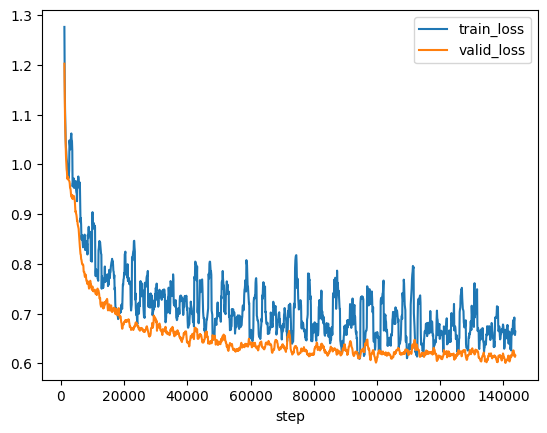

In [18]:
train_df[["train_loss", "valid_loss"]].dropna().iloc[1:].rolling(10).mean().plot()

<Axes: xlabel='step'>

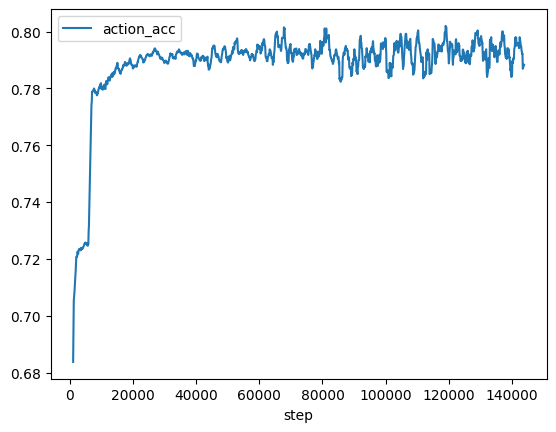

In [19]:
train_df[["action_acc"]].dropna().iloc[1:].rolling(10).mean().plot()

<Axes: xlabel='step'>

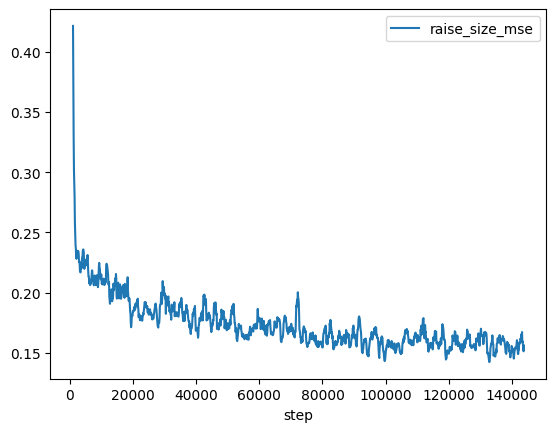

In [20]:
train_df[["raise_size_mse"]].dropna().rolling(10).mean().plot()

## Testing

In [21]:
from Poker.agents.game_state import GameState, Player
from Poker.agents.game_state import *
from Poker.core.card import *
from Poker.core.card import Rank

In [22]:
p1 = Player(1, (Card(Rank.ACE, Suit.SPADE), Card(Rank.ACE, Suit.CLUB)), 100)
p2 = Player(0, None, 80)
p3 = Player(2, None, 90)

In [23]:
game_state = GameState(
    stage = Stage.PREFLOP,
    community_cards = [],
    pot_size = 3,
    min_bet_to_continue = 0,
    my_player = p1,
    other_players = [p2, p3],
    my_player_action = (Action.RAISE, 10),
)

In [24]:
my_agent.eval_game_state(game_state)

(tensor([0.0572, 0.0384, 0.9045]), tensor(1.5549))

In [25]:
p1 = Player(1, (Card(Rank.TWO, Suit.SPADE), Card(Rank.SEVEN, Suit.CLUB)), 100)
p2 = Player(0, None, 80)
p3 = Player(2, None, 90)

In [26]:
game_state = GameState(
    stage = Stage.PREFLOP,
    community_cards = [],
    pot_size = 3,
    min_bet_to_continue = 0,
    my_player = p1,
    other_players = [p2, p3],
    my_player_action = (Action.RAISE, 10),
)

In [27]:
my_agent.eval_game_state(game_state)

(tensor([0.8941, 0.0154, 0.0904]), tensor(1.5455))

In [28]:
p1 = Player(1, (Card(Rank.ACE, Suit.SPADE), Card(Rank.KING, Suit.CLUB)), 100)
p2 = Player(0, None, 80)
p3 = Player(2, None, 90)

In [29]:
game_state = GameState(
    stage = Stage.PREFLOP,
    community_cards = [],
    pot_size = 3,
    min_bet_to_continue = 0,
    my_player = p1,
    other_players = [p2, p3],
    my_player_action = (Action.RAISE, 10),
)

In [32]:
my_agent.eval_game_state(game_state)

(tensor([0.4883, 0.0391, 0.4726]), tensor(1.5360))

## Saving

In [31]:
torch.save(my_agent.state_dict(), "a9e8c8.14060308.st")